In [1]:
from hestonpy.models.heston import Heston
from hestonpy.models.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

# With syntetic market price

In [2]:
spot = 100
time_to_maturity = 1
true_params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **true_params)
price_function = heston.call_price

strikes = np.linspace(70, 140, 10) 

### Without noise

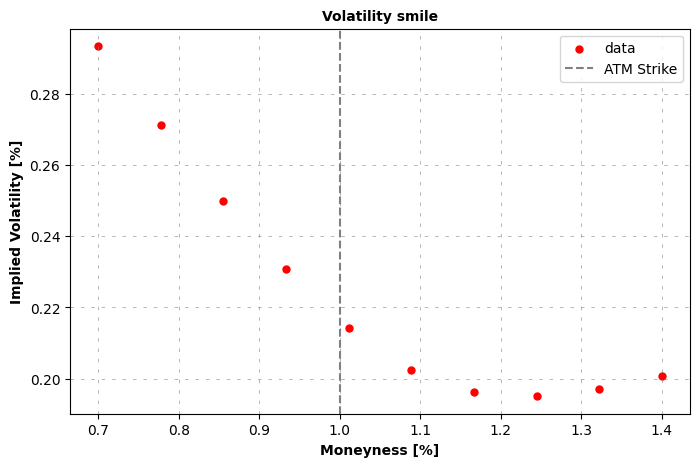

In [3]:
market_prices = price_function(**true_params, strike=strikes, time_to_maturity=time_to_maturity, s=spot)

volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

Local optimization (might not be global)

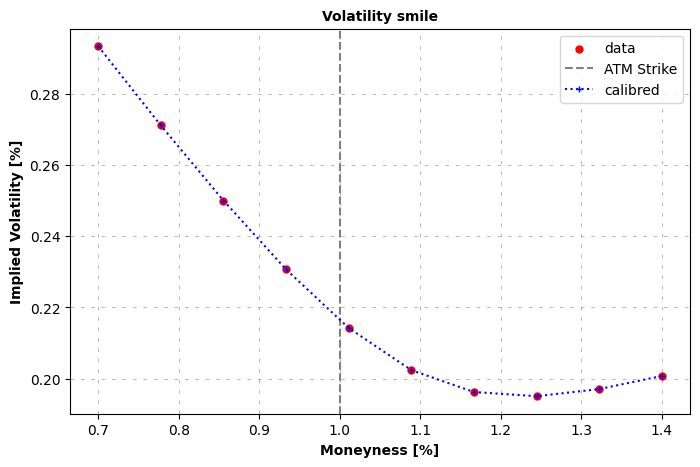

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.2215896805508848),
 'theta': np.float64(0.07961538676304517),
 'drift_emm': 0,
 'sigma': np.float64(0.6309564261853148),
 'rho': np.float64(-0.5039358304703547)}

In [4]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [5]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

Global optimization

at minimum nan accepted 1
Parameters: kappa=1.1961612881306174 | theta=0.08148266059019713 | sigma=0.5557439879384489 | rho=-0.5992511295411724

at minimum 0.000002 accepted 1
Parameters: kappa=1.114734237684245 | theta=0.08158015125255896 | sigma=0.6078390366180202 | rho=-0.5050046870211843

at minimum 0.000002 accepted 1
Parameters: kappa=1.114774835409975 | theta=0.08157940568761698 | sigma=0.607847868541049 | rho=-0.5050046826596353

at minimum 0.000079 accepted 1
Parameters: kappa=1.4580135705519583 | theta=0.07632870171531425 | sigma=0.683041979113402 | rho=-0.5017395586727302

at minimum 0.000002 accepted 1
Parameters: kappa=1.1146667124216534 | theta=0.08158160373945267 | sigma=0.6078261170458599 | rho=-0.5050057163701671

at minimum 0.000005 accepted 1
Parameters: kappa=1.0648648811359296 | theta=0.08263669236307618 | sigma=0.5971352166091731 | rho=-0.5055232321654396

at minimum 0.000025 accepted 1
Parameters: kappa=1.287674713740847 | theta=0.07857029626747095 | sigma=0.6454

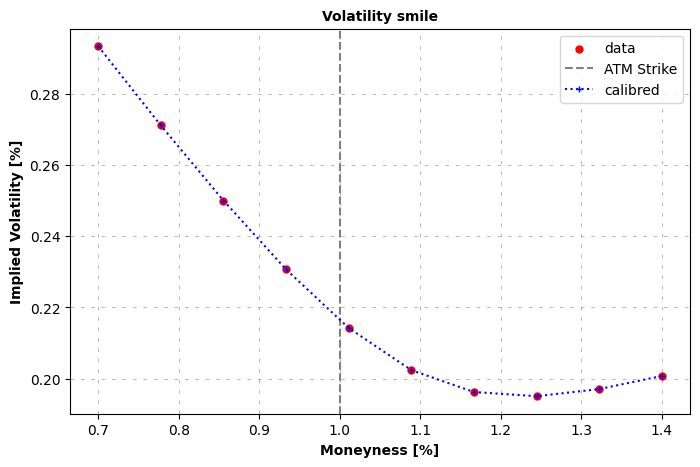

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.1146667124216534),
 'theta': np.float64(0.08158160373945267),
 'drift_emm': 0,
 'sigma': np.float64(0.6078261170458599),
 'rho': np.float64(-0.5050057163701671)}

In [6]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [7]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

with noise

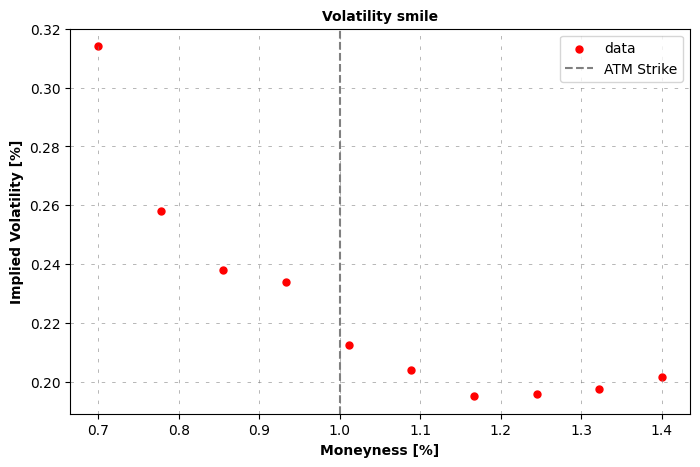

In [8]:
market_prices = market_prices * (1 + np.random.normal(scale=0.01, size=len(market_prices)))  # a little of market noise
volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

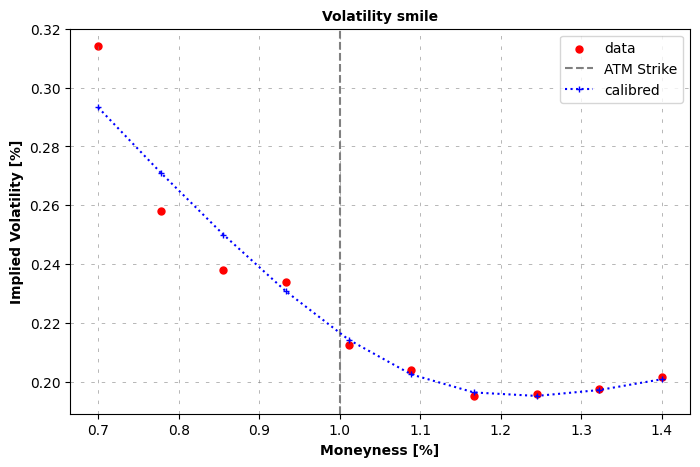

{'vol_initial': np.float64(0.04507107770024999),
 'kappa': np.float64(2.078268985414),
 'theta': np.float64(0.06959604147528588),
 'drift_emm': 0,
 'sigma': np.float64(0.7985284573646428),
 'rho': np.float64(-0.4787187483827115)}

In [9]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

at minimum nan accepted 1
Parameters: kappa=2.022860502539801 | theta=0.070051231202894 | sigma=0.7894485201357775 | rho=-0.4781841508525025

at minimum nan accepted 1
Parameters: kappa=2.0481945051329107 | theta=0.0699227633999002 | sigma=0.7988245856241967 | rho=-0.47597854937231676

at minimum nan accepted 1
Parameters: kappa=2.0481945051329107 | theta=0.0699227633999002 | sigma=0.7988245856241967 | rho=-0.47597854937231676

at minimum nan accepted 1
Parameters: kappa=1.980505891072263 | theta=0.07042288917506599 | sigma=0.7839434153846733 | rho=-0.4795838668567641

at minimum nan accepted 1
Parameters: kappa=2.1017692448532634 | theta=0.06932554895451074 | sigma=0.7994680480906942 | rho=-0.47749822882042137

at minimum nan accepted 1
Parameters: kappa=2.0481945051329107 | theta=0.0699227633999002 | sigma=0.7988245856241967 | rho=-0.47597854937231676

['success condition satisfied'] False


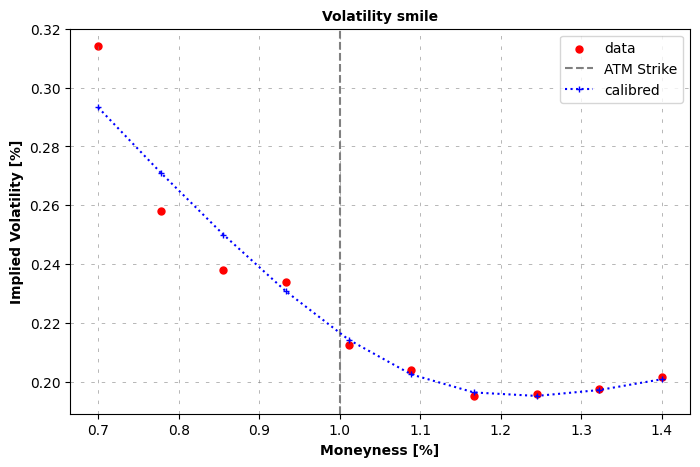

{'vol_initial': np.float64(0.04507107770024999),
 'kappa': np.float64(2.022860502539801),
 'theta': np.float64(0.070051231202894),
 'drift_emm': 0,
 'sigma': np.float64(0.7894485201357775),
 'rho': np.float64(-0.4781841508525025)}

In [10]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

With SVI

In [11]:
calibrated_params, raw_svi_ivs = volSmile.svi_smooth()
volSmile.plot(raw_svi_ivs)
calibrated_params

TypeError: Cannot instantiate typing.Literal

# With real data

In [ ]:
from hestonpy.option.data import get_options_data, filter_data_for_maturity

all_market_data, spot, maturities = get_options_data()
market_data = filter_data_for_maturity(all_market_data, maturities[5])
market_data.head(10)

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity
0,129.54,129.45,129.95,1.206547,110.0,1.0,0.154762,2025-04-17
1,125.40,124.40,125.00,1.144047,115.0,1.0,0.154762,2025-04-17
2,119.90,119.45,120.15,1.111333,120.0,6.0,0.154762,2025-04-17
3,107.90,114.45,115.15,1.052739,125.0,13.0,0.154762,2025-04-17
4,109.08,109.50,110.15,1.001958,130.0,3.0,0.154762,2025-04-17
5,98.39,104.55,105.25,0.963868,135.0,1.0,0.154762,2025-04-17
6,96.08,99.60,100.20,0.910157,140.0,2.0,0.154762,2025-04-17
7,88.15,94.65,95.25,0.867677,145.0,4.0,0.154762,2025-04-17
8,88.23,89.70,90.40,0.834230,150.0,1.0,0.154762,2025-04-17
9,85.65,84.75,85.45,0.791994,155.0,1.0,0.154762,2025-04-17


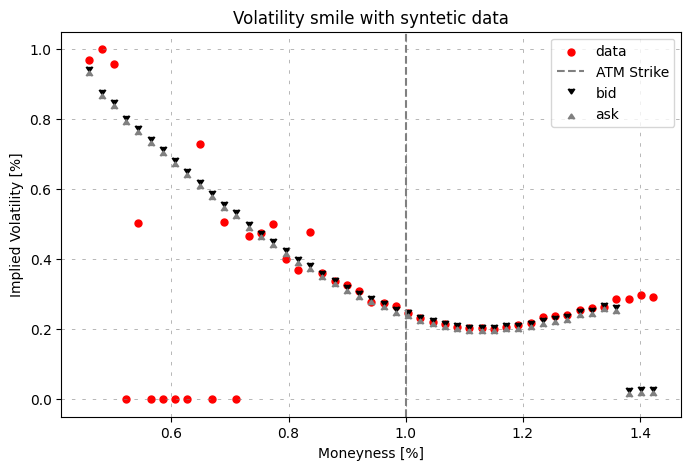

In [ ]:
time_to_maturity = market_data['Time to Maturity'].iloc[0]
strikes = market_data['Strike']
bid_prices = market_data["Bid"]
ask_prices = market_data['Ask']
market_ivs = market_data['Implied Volatility']
market_prices = market_data['Call Price']

marketVolatilitySmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    #market_ivs=market_ivs,
    market_prices=market_prices,
    r=r
)
marketVolatilitySmile.plot(bid_prices=bid_prices, ask_prices=ask_prices)

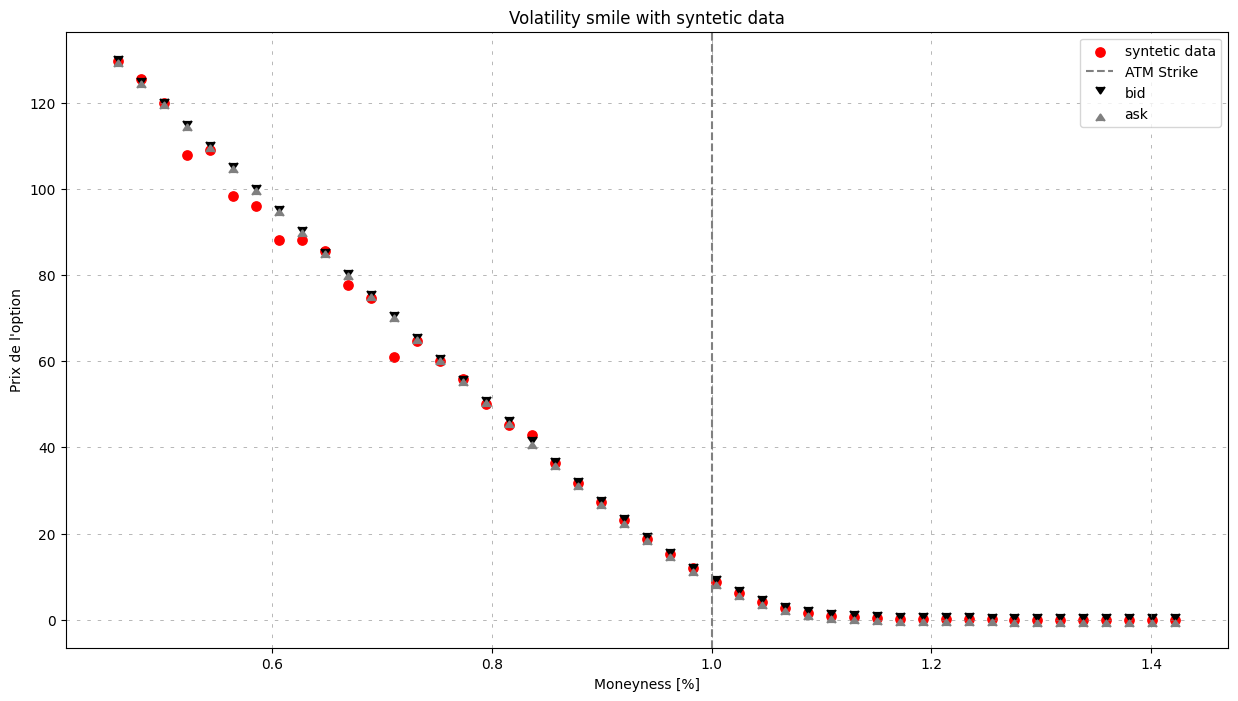

In [ ]:
plt.figure(figsize=(15, 8))

plt.scatter(strikes/spot, market_data['Call Price'], label="data", marker='o', color='red', s=45)
plt.axvline(1, linestyle="--", color="gray", label="ATM Strike")

plt.scatter(strikes/spot, market_data['Bid'], label="bid", marker=7, color='black', s=40)
plt.scatter(strikes/spot, market_data['Ask'], label="ask", marker=6, color='gray', s=40)
plt.xlabel("Moneyness [%]")
plt.ylabel("Prix de l'option")
plt.title("Volatility smile with Apple data")
plt.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5, alpha=0.8)
plt.legend()
plt.show()

la iv du marché fait pas trop de sens, plutot utiliser $$\frac{\sigma_{bid}+\sigma_{ask}}{2}$$

['success condition satisfied'] True


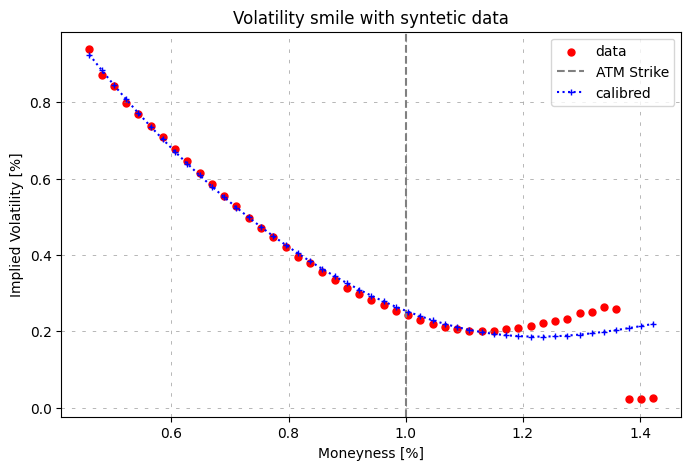

In [ ]:
marketVolatilitySmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=bid_prices,
    r=r
)

calibrated_params, raw_svi_ivs = marketVolatilitySmile.svi_smooth()
marketVolatilitySmile.plot(raw_svi_ivs)

In [ ]:
params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **params)
price_function = heston.call_price

In [ ]:
calibrated_params = marketVolatilitySmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    initial_guess=[0.33, 2.0, 2.0, -0.8],
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity, **calibrated_params)
)
calibrated_params

at minimum 2.939571 accepted 1
Parameters: kappa=2.479466718429181 | theta=0.2134291429690399 | sigma=2.0 | rho=-0.6292444663993957

at minimum 2.939571 accepted 1
Parameters: kappa=2.479308793348785 | theta=0.21343968550686898 | sigma=2.0 | rho=-0.6292461935421665



KeyboardInterrupt: 